# Angel Protocol Donations

Data source: [FlipsideCrypto](https://www.flipsidecrypto.com/)<br>
SQL Query:<br>
`select 
  event_from as donor,
  sum(event_amount_usd) as usd
from terra.transfers
where event_to = 'terra1zxtczmxtw8mk8xncvr8lcq2qmvk4dz88ek6f79'
  and event_amount_usd is not null
  and tx_status = 'SUCCEEDED'
group by 1
order by 2 desc`

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as ss

sns.set_style('darkgrid')
sns.set(font_scale=1.1)

In [2]:
df = pd.read_csv('ap_donors.csv')
df.head()

,DONOR,USD
0,terra18lvnhs0lth4g6y3yffgluzh6wn5qrndnwuaurz,86084.210333
1,terra1r59snugfm3gxjas565jf5ehw54junlfpmspjan,60945.461711
2,terra1qzpww3mw0t9aep0x6ksf7nfsvhk3tjy7xt65g7,48695.581786
3,terra1gvrggs8rukmg37p35mp773mrvfeklhwwa57x0j,47826.846600
4,terra1fj5l3wldse6n8tzs4f4eh777dhplzfr0gaczhm,32360.098119


In [3]:
df.describe()

,USD
count,210.000000
mean,2299.874592
std,9605.018676
min,0.500345
25%,3.007315
50%,26.542924
75%,160.601792
max,86084.210333


In [41]:
print(ss.mode(df.USD))

ModeResult(mode=array([0.99717107]), count=array([6]))


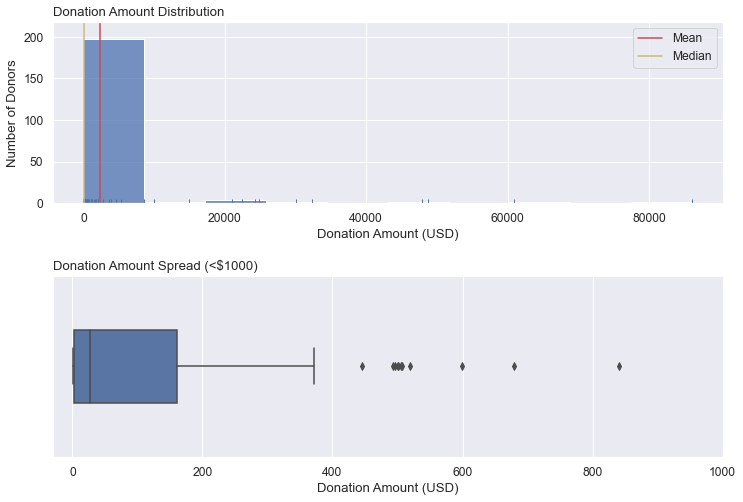

In [58]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
sns.histplot(data=df, x='USD', bins=10)
plt.title('Donation Amount Distribution', loc='left')
plt.xlabel('Donation Amount (USD)')
plt.ylabel('Number of Donors')
sns.rugplot(data=df, x='USD')
plt.axvline(np.mean(df.USD), color='r', label='Mean')
plt.axvline(np.median(df.USD), color='y', label='Median')
plt.legend()

ax2 = plt.subplot(2,1,2)
sns.boxplot(data=df, x='USD')
ax2.axis([-30,1000,-1,1])
plt.xlabel('Donation Amount (USD)')
plt.title('Donation Amount Spread (<$1000)', loc='left')

plt.subplots_adjust(hspace=0.4)
plt.show()

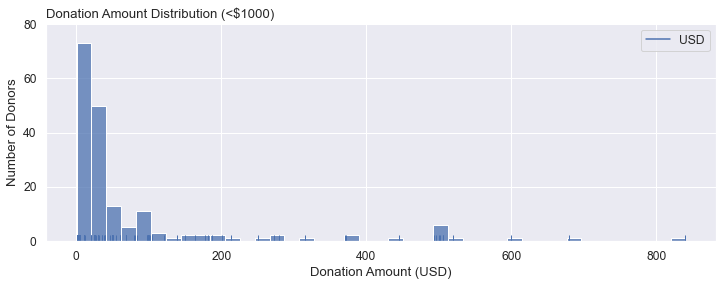

In [53]:
plt.figure(figsize=(12,4))
ax1 = plt.subplot()
sns.histplot(data=df[df.USD <= 1000], x='USD')
sns.rugplot(data=df[df.USD <= 1000])
plt.title('Donation Amount Distribution (<$1000)', loc='left')
plt.xlabel('Donation Amount (USD)')
plt.ylabel('Number of Donors')
plt.show()